<h3 align="right">STR, &nbsp; dSPN, &nbsp; 150917_c10_D1, &nbsp; WT-P270-20 <br> </h3>

# Model selection

## Model data

In [35]:
import cell_model, cell_evaluator
morphofile = 'morphology/WT-P270-20-15ak-cor.swc'
parameters = cell_model.define_parameters('parameters.json')
mechanisms = cell_model.define_mechanisms('mechanisms.json')
protocols = cell_evaluator.define_protocols('protocols.json')
calculator = cell_evaluator.define_fitness_calculator(protocols, 'features.json')
expdata = {
    'IV_505.soma.v': 'expdata/ECBL_IV_ch3_505.dat',
    'IV_509.soma.v': 'expdata/ECBL_IV_ch3_509.dat',
    'IDthresh-sub_547.soma.v': 'expdata/ECBL_IDthresh_ch3_547.dat',
    'IDthresh_548.soma.v': 'expdata/ECBL_IDthresh_ch3_548.dat',
    'IDthresh_549.soma.v': 'expdata/ECBL_IDthresh_ch3_549.dat',
    'IDthresh_550.soma.v': 'expdata/ECBL_IDthresh_ch3_550.dat'
}

## Simulation environment

In [36]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [37]:
import json
import pandas
import efel
import numpy as np
import bluepyopt as bpopt
import bluepyopt.ephys as ephys

In [38]:
from utils import *

In [39]:
!rm -rf x86_64
!nrnivmodl mechanisms

Creating x86_64 directory for .o files.

/home/HDD-drive/Repos/Alex_SPN_models/models/optim/str-dspn-e150917_c10_D1-mWT-P270-20-v20181203
mechanisms/bk.mod mechanisms/cadyn.mod mechanisms/can.mod mechanisms/car.mod mechanisms/kaf.mod mechanisms/kas.mod mechanisms/kir.mod mechanisms/naf.mod mechanisms/sk.mod
bk.mod cadyn.mod can.mod car.mod kaf.mod kas.mod kir.mod naf.mod sk.mod
"/home/HDD-drive/neuron/nrn/x86_64/bin/nocmodl" bk
Translating bk.mod into bk.c
Thread Safe
"/home/HDD-drive/neuron/nrn/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/home/HDD-drive/neuron/nrn/include/nrn" -I"/home/HDD-drive/neuron/nrn/x86_64/lib"      -g -O2 -c -o bk.lo bk.c
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/home/HDD-drive/neuron/nrn/include/nrn -I/home/HDD-drive/neuron/nrn/x86_64/lib -g -O2 -c bk.c  -fPIC -DPIC -o .libs/bk.o
"/home/HDD-drive/neuron/nrn/x86_64/bin/nocmodl" cadyn
Translating cadyn.mod into cadyn.c
Thread Safe
"/home/HDD-drive/neuron/nrn/share/nr

## Cell model definition

In [40]:
morphology = ephys.morphologies.NrnFileMorphology(
    morphofile, do_replace_axon=True)

In [41]:
cell = ephys.models.CellModel(
    'dspn', 
    morph=morphology, 
    mechs=mechanisms, 
    params=parameters)
print cell

dspn:
  morphology:
    morphology/WT-P270-20-15ak-cor.swc
  mechanisms:
    naf.basal: naf at ['basal']
    kaf.basal: kaf at ['basal']
    kas.basal: kas at ['basal']
    kir.basal: kir at ['basal']
    pas.all: pas at ['all']
    naf.somatic: naf at ['somatic']
    kaf.somatic: kaf at ['somatic']
    kas.somatic: kas at ['somatic']
    kir.somatic: kir at ['somatic']
    can.somatic: can at ['somatic']
    car.somatic: car at ['somatic']
    cadyn.somatic: cadyn at ['somatic']
    sk.somatic: sk at ['somatic']
    bk.somatic: bk at ['somatic']
  params:
    celsius: celsius = 35
    v_init: v_init = -85
    g_pas.all: ['all'] g_pas = [1e-05, 0.001]
    e_pas.all: ['all'] e_pas = [-80, -60]
    cm.axonal: ['axonal'] cm = 1
    cm.somatic: ['somatic'] cm = 1
    cm.basal: ['basal'] cm = 2.44
    Ra.all: ['all'] Ra = [200, 300]
    ek.somatic: ['somatic'] ek = -105.9
    ek.basal: ['basal'] ek = -105.9
    ena.somatic: ['somatic'] ena = 53.34
    ena.basal: ['basal'] ena = 53.34
    gb

In [42]:
opt_params = [p.name for p in cell.params.values() if not p.frozen]
for x in sorted(opt_params): print x

Ra.all
e_pas.all
g_pas.all
gbar_bk.somatic
gbar_kaf.basal
gbar_kaf.somatic
gbar_kas.basal
gbar_kas.somatic
gbar_kir.basal
gbar_kir.somatic
gbar_naf.basal
gbar_naf.somatic
gbar_sk.somatic


## Cell evaluator

In [43]:
simulator = ephys.simulators.NrnSimulator()

In [44]:
evaluator = ephys.evaluators.CellEvaluator(
    cell_model=cell,
    param_names=opt_params,
    fitness_protocols=protocols,
    fitness_calculator=calculator,
    sim=simulator)

## Optimisation results

In [45]:
with open('log.json') as fp:
    log = json.load(fp)

<IPython.core.display.Javascript object>


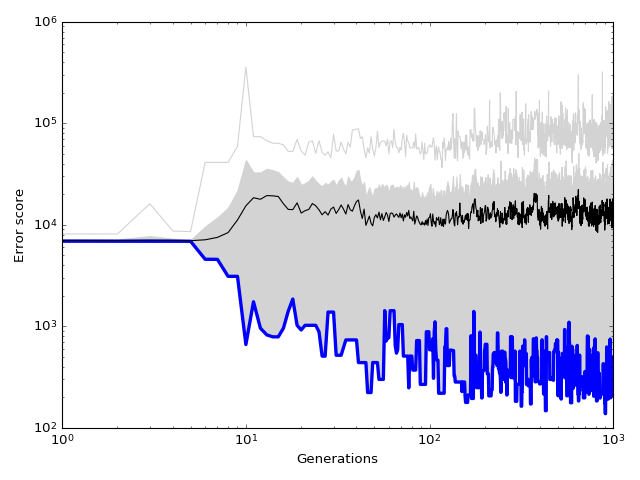

In [46]:
plot_log(log)

In [47]:
best_models = json.load(open('best_models.json'))
pandas.DataFrame(best_models).T

0           1             2             3  \
Ra.all            2.761874e+02  279.440199  2.948509e+02  2.677052e+02   
e_pas.all        -6.337129e+01  -60.704361 -6.163337e+01 -6.271894e+01   
g_pas.all         8.420868e-05    0.000069  8.882518e-05  1.158473e-04   
gbar_bk.somatic   1.286412e-02    0.004151  7.410087e-03  9.870038e-03   
gbar_kaf.basal    6.305474e-04    0.000114  1.898504e-04  8.724318e-03   
gbar_kaf.somatic  2.207524e+00    2.105615  1.620868e+00  2.080963e+00   
gbar_kas.basal    9.112238e-07    0.000002  6.536784e-07  1.967127e-08   
gbar_kas.somatic  1.060174e-03    0.022649  2.916415e-02  1.655849e-02   
gbar_kir.basal    3.049301e-04    0.000311  3.286784e-04  2.619507e-04   
gbar_kir.somatic  1.115802e-04    0.000016  4.439730e-04  7.890501e-04   
gbar_naf.basal    2.347053e-04    0.000463  2.100980e-02  1.003695e-01   
gbar_naf.somatic  2.388197e+01   24.524994  2.137069e+01  2.440321e+01   
gbar_sk.somatic   5.149006e-01    0.313088  7.152530e-02  1.455056e-01   

                           4           5             6           7  \
Ra.all            242.145035  285.732227  2.506326e+02  276.336958   
e_pas.all         -64.593200  -68.297016 -6.318419e+01  -61.476362   
g_pas.all           0.000059    0.000086  6.656112e-05    0.000084   
gbar_bk.somatic     0.000467    0.000844  1.822563e-02    0.014424   
gbar_kaf.basal      0.063241    0.038247  9.424065e-03    0.045262   
gbar_kaf.somatic    1.156718    1.344283  2.125559e+00    1.919397   
gbar_kas.basal      0.000173    0.000007  5.345011e-07    0.000058   
gbar_kas.somatic    0.024175    0.010204  2.101303e-03    0.012687   
gbar_kir.basal      0.000221    0.000276  2.956756e-04    0.000206   
gbar_kir.somatic    0.000617    0.000296  1.049768e-04    0.000646   
gbar_naf.basal      0.196913    0.105778  1.043772e-01    0.344118   
gbar_naf.somatic   22.726335   22.740748  2.551459e+01   23.771489   
gbar_sk.somatic     0.039868    0.017363  1.475061e-01    0.782444   

                             8             9  
Ra.all            2.262873e+02  2.962364e+02  
e_pas.all        -6.698391e+01 -6.266482e+01  
g_pas.all         6.710977e-05  8.219852e-05  
gbar_bk.somatic   1.800672e-03  2.367546e-02  
gbar_kaf.basal    4.949059e-02  2.973655e-02  
gbar_kaf.somatic  1.691323e+00  2.196074e+00  
gbar_kas.basal    1.792460e-08  5.862089e-08  
gbar_kas.somatic  6.492162e-03  1.586192e-03  
gbar_kir.basal    1.974939e-04  2.082009e-04  
gbar_kir.somatic  9.028223e-04  6.027688e-04  
gbar_naf.basal    1.011079e-04  6.123420e-02  
gbar_naf.somatic  2.397185e+01  2.323071e+01  
gbar_sk.somatic   3.618406e-01  1.830455e-01

In [48]:
evaluate_all = True
best_objectives = []
if evaluate_all:
    for params in best_models:
        objectives = evaluator.evaluate_with_dicts(params)
        best_objectives.append(objectives)
    df = pandas.DataFrame(best_objectives).T
    df = df.sort_index(axis=0, ascending=False)

<IPython.core.display.Javascript object>


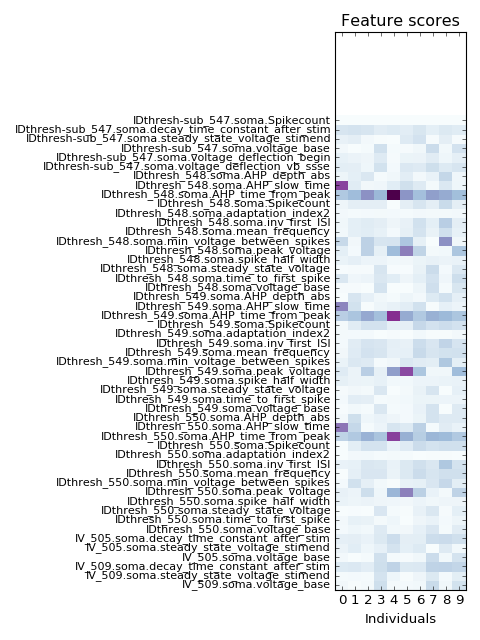

In [49]:
if evaluate_all:
    plot_scores(df, figsize=(6,8))

## Single-cell simulation

In [50]:
ind = 2 # 2, 1, 4
test_parameters = best_models[ind]

In [51]:
test_responses = evaluator.run_protocols(
    protocols=protocols.values(), 
    param_values=test_parameters)

In [66]:
for index, (name, response) in enumerate(sorted(test_responses.items())):
    if not index == 3: continue
    R = response
    print R['time']
    data = np.loadtxt(expdata[name])
    time = data[:,0]
    voltage = data[:,1] - 9.5
    plt.plot(time, voltage, color='black')
    plt.plot(R['time'], R['voltage'], color='red')
plt.show()

0          0.000000
1          0.000347
2          0.000866
3          0.001939
4          0.003554
5          0.005996
6          0.008437
7          0.014515
8          0.020593
9          0.026670
10         0.032748
11         0.042291
12         0.051834
13         0.067675
14         0.083515
15         0.099356
16         0.126865
17         0.154374
18         0.205665
19         0.256956
20         0.308247
21         0.359538
22         0.410828
23         0.498830
24         0.586832
25         0.674834
26         0.813503
27         0.952172
28         1.090841
29         1.352925
           ...     
6184    2789.727181
6185    2794.854439
6186    2799.981696
6187    2805.108954
6188    2810.236212
6189    2815.363470
6190    2820.490728
6191    2825.617985
6192    2830.745243
6193    2835.872501
6194    2840.999759
6195    2846.127017
6196    2851.254274
6197    2856.381532
6198    2861.508790
6199    2866.636048
6200    2875.506821
6201    2884.377594
6202    2893.248366


<IPython.core.display.Javascript object>


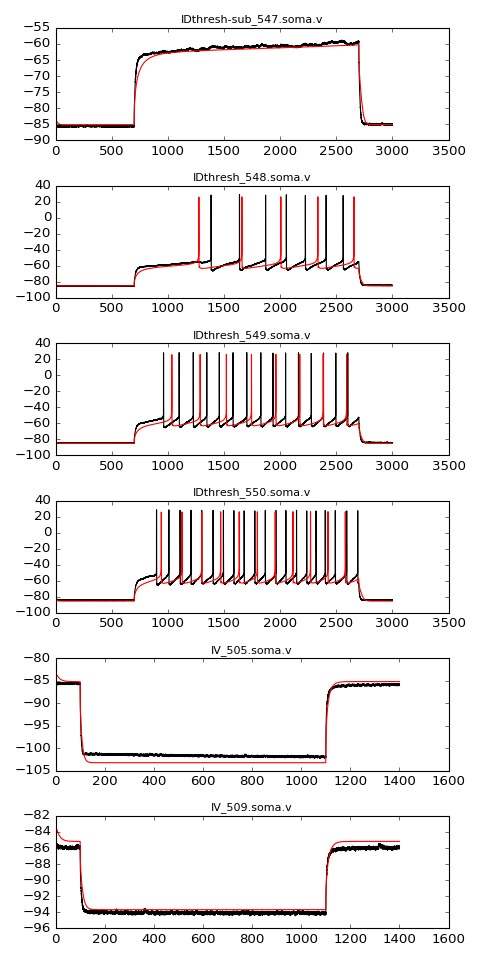

In [53]:
plot_responses(test_responses, expdata=expdata, junction_potential=9.5, figsize=(6,12))

<IPython.core.display.Javascript object>


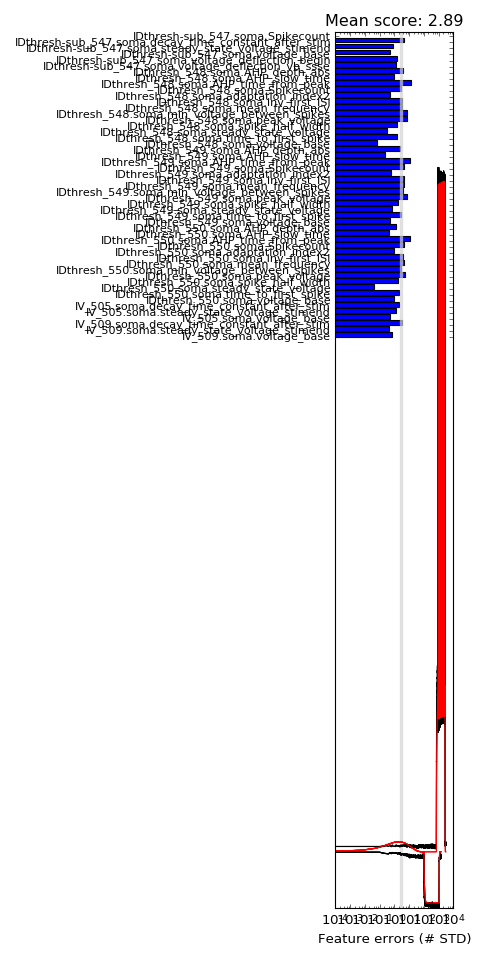

In [54]:
if evaluate_all:
    objectives = best_objectives[ind]
else:
    objectives = evaluator.evaluate_with_dicts(test_parameters)
plot_objectives(objectives, figsize=(6,12))

In [55]:
from numpy.linalg import norm
d = []
for i in range(len(best_models)):
    v = []
    for j in range(len(best_models)):
        p1 = np.array([best_models[i][p] for p in sorted(best_models[i])])
        p2 = np.array([best_models[j][p] for p in sorted(best_models[j])])
        v.append(norm((p1-p2)/(p1+p2)))
    d.append(v)
df = pandas.DataFrame(data=np.round(d,2))
df

0     1     2     3     4     5     6     7     8     9
0  0.00  1.56  1.78  2.09  2.45  2.25  1.51  2.05  1.96  1.88
1  1.56  0.00  1.62  2.05  2.28  2.13  2.00  2.10  1.96  2.26
2  1.78  1.62  0.00  1.60  1.91  1.84  1.69  1.94  2.08  1.81
3  2.09  2.05  1.60  0.00  1.76  1.75  1.49  1.53  1.57  1.24
4  2.45  2.28  1.91  1.76  0.00  1.26  2.05  1.50  1.85  1.91
5  2.25  2.13  1.84  1.75  1.26  0.00  1.81  1.68  1.83  1.83
6  1.51  2.00  1.69  1.49  2.05  1.81  0.00  1.80  2.03  1.25
7  2.05  2.10  1.94  1.53  1.50  1.68  1.80  0.00  1.70  1.61
8  1.96  1.96  2.08  1.57  1.85  1.83  2.03  1.70  0.00  1.62
9  1.88  2.26  1.81  1.24  1.91  1.83  1.25  1.61  1.62  0.00

In [56]:
selected = [2, 1, 4]   # from range(10)

In [57]:
hall_of_fame = []
for model in selected:
    hall_of_fame.append(best_models[model])
with open('hall_of_fame.json', 'w') as fp:
    json.dump(hall_of_fame, fp, indent=4, sort_keys=True)

In [58]:
with open('best_parameters.json', 'w') as fp:
    json.dump(test_parameters, fp, indent=4, sort_keys=True)